# Prediction of BoardGameGeek Reviews

## NAME: Ruochen Chang
## ID: 1001780924

# Introduction
#### This is a blog illustrates the implementation of Naive Bayes from scratch.Our goal in this blog is to build a classification model to predict the rating of reviews using Naive Bayes.
####  I just refered the Naive Bayes model from the Internet and built the classification model from scratch by myself.3
#### The basic idea of Naive Bayes is: For a given item to be classified, find the probability of occurrence of each category under the condition that this item appears, whichever is the largest, it is considered that the item to be classified belongs to that category.

# Naive Bayes model:
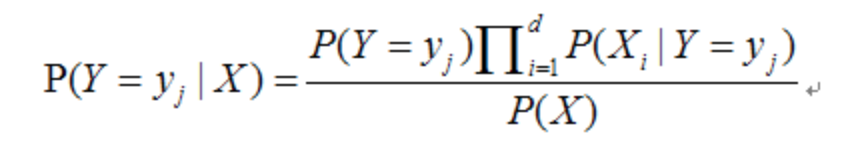

#### Because all the Y and P(X) are the same, so we can equate the model to such model:
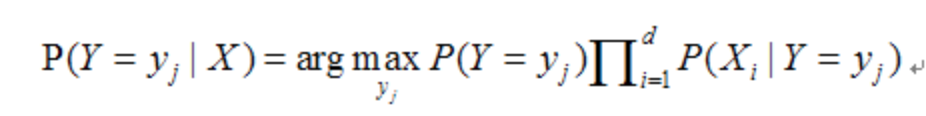
#### So we need to calculate the probability and conditional probability of our data.

# Steps to do the Naive Bayes
## a. Divide the dataset as train data for 70% and test data for 30%.  
### Data Description:
#### This review file has 2 columns, comment and rating. 
#### comment is the review text we should classify
#### rating is the score of the reviews.
### Our goal is predicting the rating according to the comment text.

#### For this data, the value of data is continuous. So I make them discreet as such rules:
#### First, I rounded them to integer number. Then, 
#### rate as 1 for numbers from 0 to 2;
#### rate as 2 for numbers from 3 to 4;
#### rate as 3 for numbers from 5 to 6;
#### rate as 4 for numbers from 7 to 8;
#### rate as 5 for numbers from 9 to 10;

#### After loading all the data to the jupyter, I did some pre-processing including text cleaning, tokenization and remove stopwords.
#### Our data is often confusing and unintuitive. Therefore, we always have to pre-process the data in a series, which makes the data format more standardized and the content more reasonable. Common data preprocessing methods are: fill in the null value, remove the outliers, data cleaning, tokenization, remove stopwords and so on.

In [7]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import numpy as np


original_data = pd.read_csv('reviews.csv')
all_data = pd.DataFrame(original_data, columns=['comment', 'rating']).dropna()
all_data = shuffle(all_data)
all_data = pd.DataFrame(all_data).reset_index(drop=True)

def round_amount(a):
    res = int(float(a))
    if res == 0 or res == 1 or res == 2:
        label = 0
    if res == 3 or res == 4:
        label = 1
    if res == 5 or res == 6:
        label = 2
    if res == 7 or res == 8:
        label = 3
    if res == 9 or res == 10:
        label = 4
    return label


all_data['rating'] = all_data['rating'].apply(round_amount)
    

import re
import string

def clean_text(text):
    # Make text lowercase, remove text in square brackets,remove links,remove punctuation
    # remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text


# Applying the cleaning function to both test and training datasets
all_data['comment'] = all_data['comment'].apply(lambda x: clean_text(x))

import nltk
from nltk.corpus import stopwords

def remove_stopwords(text):
    words = [w for w in text if w not in stopwords.words('english')]
    return words

train = all_data[:int(0.7*len(all_data))]
train = pd.DataFrame(train)
test = all_data[int(0.7*len(all_data)):]
test = pd.DataFrame(test)
print("length of train data: ", len(train))
print("length of test data: ", len(test))
# tokenization
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
train['comment'] = train['comment'].apply(lambda x: tokenizer.tokenize(x))
test['comment'] = test['comment'].apply(lambda x: tokenizer.tokenize(x))
train['comment'] = train['comment'].apply(lambda x: remove_stopwords(x))
test['comment'] = test['comment'].apply(lambda x: remove_stopwords(x))

length of train data:  1846429
length of test data:  791327


In [8]:
print("train data:")
print(train.head())
print("\n")
print("test data:")
print(test.head())

train data:
                                             comment  rating
0              [game, didnt, suck, didnt, find, fun]       2
1  [initial, rating, got, lower, due, long, play,...       3
2  [cool, learn, study, games, like, become, cumb...       2
3  [probably, oldest, gamers, game, one, showing,...       2
4                                  [gets, old, fast]       2


test data:
                                                   comment  rating
1846429  [original, game, gazillon, expansions, game, t...       2
1846430  [favourite, version, rummy, theme, works, well...       3
1846431  [great, introduction, campaigns, napoleon, sys...       3
1846432  [high, trade, value, cards, sleeved, played, l...       3
1846433  [hexes, little, restrictive, aside, probably, ...       3


## b. Build a vocabulary as list. 
#### Building a vocabulary means build a dictionary for all the words with their occurrence under every label like this: {'happy': [10, 20, 30, 40, 50], ...}. This example means the word happy occurs 10 times under label 1, 20 times under label 2, 30 times under label 3 and so on.
#### To be more reasonable, I removed words whose occurrence are less than 10.

In [9]:
all_words = {}
all_s = ""
for index, row in train.iterrows():
    s = " ".join(row['comment'])
    all_s = all_s + s
all_words = all_s.lower().split(' ')

def count_words(data):
    vocabulary_list = {} # {'word':[]}
    for index, row in data.iterrows():
        for word in row['comment']:
            if word not in vocabulary_list:
                vocabulary_list[word] = [0, 0, 0, 0, 0]
            else:
                if row['rating'] == 0:
                    vocabulary_list[word][0] += 1
                if row['rating'] == 1:
                    vocabulary_list[word][1] += 1
                if row['rating'] == 2:
                    vocabulary_list[word][2] += 1
                if row['rating'] == 3:
                    vocabulary_list[word][3] += 1
                if row['rating'] == 4:
                    vocabulary_list[word][4] += 1
    for word in list(vocabulary_list.keys()):
        if vocabulary_list[word][0]+vocabulary_list[word][1]+vocabulary_list[word][2]+vocabulary_list[word][3]+vocabulary_list[word][4] < 10:
            del vocabulary_list[word]
    return vocabulary_list

vocabulary_list = count_words(train)
print('examples of the vocabulary list:')
print(list(vocabulary_list.items())[:20])

examples of the vocabulary list:
[('game', [43811, 139985, 489289, 808936, 295393]), ('didnt', [1825, 7954, 18987, 14128, 3488]), ('suck', [150, 340, 931, 1118, 293]), ('find', [1175, 4740, 15339, 20548, 7255]), ('fun', [4852, 20851, 103091, 187856, 46340]), ('initial', [207, 1261, 4930, 6804, 1572]), ('rating', [1774, 6197, 23511, 34048, 9241]), ('got', [1498, 4861, 15306, 23082, 7991]), ('lower', [172, 602, 2055, 2843, 659]), ('due', [473, 1849, 6296, 10206, 3242]), ('long', [2694, 10295, 29908, 35439, 11131]), ('play', [11282, 42663, 153352, 232802, 80007]), ('time', [4502, 15269, 50888, 82513, 34209]), ('cool', [586, 2585, 9401, 15694, 3736]), ('learn', [325, 1319, 7205, 20326, 9067]), ('study', [30, 116, 365, 572, 321]), ('games', [7166, 24060, 74610, 116441, 51530]), ('like', [8041, 33504, 111632, 166360, 44658]), ('become', [220, 883, 3694, 6876, 3117]), ('cumbersome', [42, 170, 510, 498, 122])]


#### write the vocabulary to a txt file.

In [10]:
f = open('data.txt','w')
f.write(str(vocabulary_list))
f.close()

## c. Calculate the probability and conditional probability for all the words.

#### calculate the total number of every label.

In [11]:
total_length = len(train)
    
def cal_label_count():
    result = []
    for i in range(5):
        count = 0
        for index, row in train.iterrows():
            if row['rating'] == i:
                count += 1
        result.append(count)
    return result

label_count = cal_label_count()
print(label_count)

[42940, 146435, 535168, 857125, 264761]


##### Probability of the occurrence: P[word] = num of documents containing this word / num of all documents
##### Conditional probability based on the sentiment: P[word | Positive]  = number of positive documents containing this word / num of all positive review documents

#### There are 5 labels totally. So I build a probability list and a conditional probability list to save different 5 labels.
### To make our model more reasonable, I used Laplace smoothing to solve the problem of zero probability.
## Laplace Smoothing:
#### The zero probability problem is that if a certain amount x does not appear in the observation sample library (training set), the result of probability of the entire instance will be 0 when calculating the probability of an instance. In the problem of text classification, when a word does not appear in the training sample, the probability of that word is 0, and it is also 0 when the probability of text occurrence is calculated using multiplication. Clearly, this is unreasonable, and you cannot arbitrarily think that the probability of an event is 0 because it is not observed. In order to solve the problem of zero probability, the French mathematician Laplace first proposed the method of adding 1 to estimate the probability of a phenomenon that a data has not occurred, so this smoothing is also called Laplace smoothing. Assuming that the training sample is very large, the estimated probability change caused by adding 1 to the count of each component x can be ignored, but it can easily and effectively avoid the zero probability problem.

In [18]:
def cal_prob(i):
    count = 0
    for index, row in train.iterrows():
        if row['rating'] == i:
            count += 1
    return (count+1)/(len(train)+5)

# prior probability
prior_list = []
for i in range(5):
    prior_list.append(cal_prob(i))
print("prior probability: ", prior_list)  

def conditional_prob(word, i):
    all_count = label_count[i]
    if word in vocabulary_list:
        return (vocabulary_list[word][i]+1)/(all_count+5)
    if word not in vocabulary_list:
        return 1/(all_count+5)

print("\nOcurrence of going word under label 1: ", conditional_prob('going', 1))

prior probability:  [0.023256179208138498, 0.07930746509217226, 0.28983922523090455, 0.4642061400515805, 0.14339099041720418]

Ocurrence of going word under label 1:  0.030893198579623055


## d. predict test data
#### For test data, we have also pre-processed before, so it is clean data to make prediction. I classified all the test data accroding to our model and print the accuracy. The result of accuracy is about 40%.

In [19]:
def classify(s):
    pred_list = []
    for i in range(5):
        pred = prior_list[i]
        for word in s:
            newpred = conditional_prob(word, i)
            pred *= newpred
        pred_list.append(pred)
    max_prob = max(pred_list)
    return pred_list.index(max_prob)

pred_right = 0
for index, row in test.iterrows():
    if row['rating'] == classify(row['comment']):
        pred_right += 1

accuracy = pred_right/len(test)
print("*********predict accuracy*********")
print(accuracy)

*********predict accuracy*********
0.4036574007963838


# Challenge:
#### This data is continuous, so I made them discreet. At first, I divided the rating value to 10 grades, but the accuracy is about 20%. So I chose to divide the rating value to 5 grades which is more reasonable because there are so many websites setting the review rating as 5 grades.
#### In the future, I want to have a try to build a SVM model and LSTM model to make classification because the time is limited this time.